[statinfer.com](https://statinfer.com/)

# Packages Installation

In [ ]:
! pip install nltk
! pip install spacy

In [ ]:
import pandas as pd
import nltk
import spacy
nltk.download("all")

# Data Importing

In [4]:
twitter_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Twitter_Sentiment/Twitter_Sentiment_Data.csv")
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label
966,8c015be59f,i dont feel very good,negative
20091,dffcd948d3,hahaha yeah i see that. but he can`t twitter m...,neutral
8341,6adcde8364,passed my drivers test! i can drive!...oh wait...,neutral
7066,edb2d20a13,That is EXACTLY how I feel right now.,neutral
25412,afc78ee956,My dad`s drunk off his ****. Today was success...,positive
26385,9f03acc2ae,history project,neutral
3604,899ba63056,Sorry to disappoint. Not a big Nascar fan but...,negative
22258,4e6e3ebb75,just got home. errrr... V.Luna hospital is so...,negative
21856,84ecc180c2,O dios acaban de tocar The Pains Of Being Pure...,negative
23563,9f371406d6,I need to relocate to the west coast.. This we...,negative


#Lower Case conversion

In [5]:
twitter_data["tweet_lowcase"]=twitter_data["raw_tweet"].apply(lambda x:str(x).lower())
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase
24588,16a6c22866,20 mins from BEJ to Semanggi. Traffic on Frida...,neutral,20 mins from bej to semanggi. traffic on frida...
12751,4f0949064a,I forgot I have lumpia and pancit in my fridge...,positive,i forgot i have lumpia and pancit in my fridge...
22597,2f3ac07330,Swimming is a no go for me,negative,swimming is a no go for me
1425,a7b0df1c27,I`m likable after all HAHAHAHAHAHAHA! Still ov...,positive,i`m likable after all hahahahahahaha! still ov...
8627,16f737bd6c,CONGRATS !! I just KNEW a princess would win!!...,positive,congrats !! i just knew a princess would win!!...
12460,a7742bc5fa,out shopping....,neutral,out shopping....
25620,ebe46589f3,That would be most welcome,positive,that would be most welcome
18826,df7ee6a593,still @ the courthouse! Happy to have a j...,neutral,still @ the courthouse! happy to have a j...
18667,b919338c19,Where can I get nice food for Mam down the Bay...,positive,where can i get nice food for mam down the bay...
2604,8d55b9acb6,lol u better hurry up cause your **** is runn...,neutral,lol u better hurry up cause your **** is runn...


#Tokenizing

In [6]:
from nltk.tokenize import word_tokenize
twitter_data["word_tokens"] = twitter_data["tweet_lowcase"].apply(lambda x:word_tokenize(str(x)))
#lambda function to apply on all rows
#str() function to avoid numeric and other errors
twitter_data[["raw_tweet","word_tokens"]].sample(10)

,raw_tweet,word_tokens
8913,Happy Star Wars Day!!!,"[happy, star, wars, day, !, !, !]"
15727,oh hell yeah lol. im a vegetarian tho but i ...,"[oh, hell, yeah, lol, ., im, a, vegetarian, th..."
18598,Things that happened today: My younger brothe...,"[things, that, happened, today, :, my, younger..."
19153,I`m such a chicken,"[i, `, m, such, a, chicken]"
24880,'AAARRRGGGGHHH' is the only thing that can dec...,"['aaarrrgggghhh, ', is, the, only, thing, that..."
5980,Watching the CAVS!!!!!,"[watching, the, cavs, !, !, !, !, !]"
8731,victory for the bulldogs was celebrated by 3 w...,"[victory, for, the, bulldogs, was, celebrated,..."
17844,_Carroll i want a marty mcflyy t-shirt.,"[_carroll, i, want, a, marty, mcflyy, t-shirt, .]"
5338,Aww maybe i traumatized her.,"[aww, maybe, i, traumatized, her, .]"
1134,That is super sad How is Bart etc holding up?,"[that, is, super, sad, how, is, bart, etc, hol..."


In [ ]:
twitter_data[["raw_tweet","word_tokens"]].sample(10)

# Expanding shortforms

In [8]:
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

In [9]:
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

**Example : **

1.   x= string from index no 6207.
2.   Convert it's to it is, rest remains same.
3.  use above created def function: expanded_form but here it is used on single tweet/line

In [10]:
x=str(twitter_data["tweet_lowcase"][6207])
print("original tweet ==>", x)
x=x.split()
print("Expanded form ==>",[expanded_form(t) for t in x])

original tweet ==>  it`s under a honeymoon by the good life
Expanded form ==> ['it is', 'under', 'a', 'honeymoon', 'by', 'the', 'good', 'life']


Applying def function created above to whole dataset

List comprehension:
1. twitter_data["tweet_expanded"]= twitter_data["tweet_lowcase "].apply(lambda x:[expanded_form(t) for t in str(x).split()])
2. Result: condtion after x: which is expanded_form
3. condition 1: for t in str(x)  : for t in each row x
4. condition 2: .split()

In [11]:
twitter_data["tweet_expanded"]=twitter_data["tweet_lowcase"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
twitter_data[["raw_tweet","tweet_expanded"]].sample(10)

,raw_tweet,tweet_expanded
5436,going out for the good ol` `soak` tonight for ...,"[going, out, for, the, good, ol`, `soak`, toni..."
20884,Is sad clint hurdle got released. I liked him,"[is, sad, clint, hurdle, got, released., i, li..."
1384,_pe awesomeness! Phillip hasn`t completely fin...,"[_pe, awesomeness!, phillip, has not, complete..."
19265,thanks dude. Being a low level business man i...,"[thanks, dude., being, a, low, level, business..."
4660,wishing my days off were the same days that pe...,"[wishing, my, days, off, were, the, same, days..."
970,"Visiting the grandparents in Manhattan, and dr...","[visiting, the, grandparents, in, manhattan,, ..."
16227,Stupid MSN It wont let me onnnn,"[stupid, msn, it, wont, let, me, onnnn]"
22712,haha! nice! Have fun doll! Hopefully I`ll see...,"[haha!, nice!, have, fun, doll!, hopefully, i ..."
24730,starts tomorrow and I start to study again,"[starts, tomorrow, and, i, start, to, study, a..."
21918,I`ll guess I will see everyone after the weeke...,"[i will, guess, i, will, see, everyone, after,..."


In [ ]:
twitter_data[["raw_tweet","tweet_expanded"]].sample(10)

# Stopwords Removal




List comprehension:
1. twitter_data["After_Removing_Stopwords"]= twitter_data ["word_tokens"].apply( lambda x:[t for t in x if t not in spacy_stopwords])
2. t= result
3. for t in x : first condition
4. follwed by second condition

## NLTK Stopwords

In [12]:
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english')) ##Selecting the stop words from the Language
print("Number of Stop words in NLTK ==>", len(nltk_stop_words))
print(sorted(nltk_stop_words))

Number of Stop words in NLTK ==> 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 

## spaCy Stopwords

In [13]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
print("Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))
#Spacy stopwords list looks better.

Number of Stop words in spaCy ==> 326
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'ha

1.**Removing stop words**
2. [t for t in x if t not in spacy_stopwords])
3. applying on one line 16355

In [14]:
x=twitter_data["tweet_expanded"][16355]
print("original tweet ==>", x)
print("After Removing Stopwords ==>",[t for t in x if t not in spacy_stopwords])

original tweet ==> ['i', 'cannot', 'believe', 'how', 'tired', 'i', 'am', 'right', 'now...', 'i', 'do not', 'know', 'if', 'i', 'can', 'go', 'out', 'tonight...', 'exhaaaausted!!']
After Removing Stopwords ==> ['believe', 'tired', 'right', 'now...', 'do not', 'know', 'tonight...', 'exhaaaausted!!']


1. **Removing stop words**
2. .apply(lambda x:[t for t in x if t not in spacy_stopwords ])
3. remove from entire dataset

In [15]:
twitter_data["After_Removing_Stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data[["raw_tweet","After_Removing_Stopwords"]].sample(10)

,raw_tweet,After_Removing_Stopwords
1979,we want ot protect Moleskineï¿½ notebooks wor...,"[want, ot, protect, moleskineï¿½, notebooks, w..."
18826,still @ the courthouse! Happy to have a j...,"[@, courthouse!, happy, job..., sad, one!]"
17978,RIP Robin from the Washington Park library,"[rip, robin, washington, park, library]"
15991,I`m not in America! I`m not going anymore Yo...,"[i am, america!, i am, going, anymore, phoned,..."
15778,crossing my fingers for ya! & hey you`ll be o...,"[crossing, fingers, ya!, &, hey, you`ll, town!..."
22112,hey there? hope you`re all right. Just watchi...,"[hey, there?, hope, you`re, right., watching, ..."
14357,Should not drink cheap wine,"[drink, cheap, wine]"
20592,"Going to bed, in pain fell on my shoulder toda...","[going, bed,, pain, fell, shoulder, today., go..."
2406,Awake at 4am.. can`t sleep,"[awake, 4am.., sleep]"
5167,Oh ffs :@ a don`t get paid till monday :@:@:@ ...,"[oh, ffs, :@, do not, paid, till, monday, :@:@..."


## Add Custom Stopwords

#If we want to remove custom/additional stop words, in spacy stop words then
2. spacy_stopwords.update
3. add words you want to remove.
4. new atopwords= 331. previous in package =326

In [16]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
print("New Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))

New Number of Stop words in spaCy ==> 331
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'ha', 'had', 

running code again but with new stop words. Original space stopwords = 326. New spacy stop words = 331

In [17]:
twitter_data["After_Removing_Stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data[["raw_tweet","After_Removing_Stopwords"]].sample(10)

,raw_tweet,After_Removing_Stopwords
25317,just answered you- never learned how to write...,"[answered, you-, learned, write, french-, basi..."
1215,the fact my room is so hot is making me feel sick,"[fact, room, hot, making, feel, sick]"
16742,I`ll give u an icecream ?,"[i will, u, icecream, ?]"
11759,....what did she EVER do to piss them off? ...,"[....what, piss, off?, thought, meant, casting..."
1725,Inshalla! Devo I wont be at the Astor tonight,"[inshalla!, devo, wont, astor, tonight]"
19126,hehehe!! Are you tryna find another condom b...,"[hehehe!!, tryna, find, condom, better, u, box..."
6461,Don`t count on it,"[do not, count]"
5561,I just put my TV on the Canucks game and they ...,"[tv, canucks, game, score, yaay, come, vancity..."
23560,Sounds good to me! No more cleaning cynics or...,"[sounds, good, me!, cleaning, cynics, orders.,..."
27380,getting ready for my first day at my new job,"[getting, ready, day, new, job]"


#Regular Expression

#**code**: re.sub (pattern, replacement, string)
1. pattern: eg pattern to identy email address
2. replace with eg space (means delete)
3. string: input string

#create function to remove regular exp.

remove urls will also work for tweets with images.

In [18]:
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

#apply function on dataset

In [19]:
import re
twitter_data["tweet_cleaned_Regex"]=twitter_data["After_Removing_Stopwords"].apply(lambda x:clean_with_re(x))
twitter_data[["raw_tweet","tweet_cleaned_Regex"]].sample(10)

,raw_tweet,tweet_cleaned_Regex
24849,i think i`ll be home more than i want to be n...,think i will home want week work booked forse...
24461,"aw thank you sam phil, i love you",aw thank sam phil love
18716,I`ll send you the youtube link <3,i will send youtube link
8149,ummmm i have no idea what im doing but my frie...,ummmm idea im friend pissed dont know hates he...
3655,Umm yeah. That`s probably a pretty good note ...,umm yeah that is probably pretty good note sel...
5684,sorry to hear that,sorry hear
7361,i have the adam lambert version of FEELIN GOOD...,adam lambert version feelin good head miss ido...
3937,is tired and about to go to sleep. night everyone,tired sleep night
27005,i miss you when are you gonna be down in irv...,miss gonna irvine again liz reminiscing advent...
15110,hahahahah!! 04 would be the chief contributor...,hahahahah chief contributors lol


In [ ]:
twitter_data[["After_Removing_Stopwords","tweet_cleaned_Regex"]].sample(10)

#Spelling Correction

#**we dont apply spelling correction on real dataset.**

**install text blob**

1. We need to install text blob package for spell check and correction
2. It is not 100% accurate but its good enough for most of the datasets.
3. We can avoid this step on datasets like twitter where the text is often written in the short forms and informal language.

In [ ]:
#!pip install textblob
#!python textblob.download_corpora

In [21]:
from textblob import TextBlob
sample_tweet="What an grat and amazimg week. I am excited to learn data scienec"
corrected_tweet=TextBlob(sample_tweet).correct()
corrected_tweet

TextBlob("That an great and amazing week. I am excited to learn data science")

#Lemmatization

1. converting different words to same word
2. words with similar root word like plural, tense etc.
3. bought, buying, buy
4. eg below responded convted to root word : respond
5. going convted to root word : go

In [23]:
spacy_model = spacy.load('en_core_web_sm')

In [24]:
sample_tweet=twitter_data["tweet_cleaned_Regex"][0]
print("Original Text ==>", sample_tweet)
print("Lemmatization Results ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet))]))
#print("Lemmatization PRON removed ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet)) if t.lemma_ !="-PRON-" ]))

Original Text ==> i would responded going
Lemmatization Results ==> I would respond go


Applying on enitre dataset

In [25]:
twitter_data["Lemmatized_tweet"] = twitter_data["tweet_cleaned_Regex"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
twitter_data[["raw_tweet","Lemmatized_tweet"]].sample(10)

,raw_tweet,Lemmatized_tweet
17676,Lol... Its NOT the same!!!,lol same
25557,"hmm. I`m disappointed. I made 2 servings, and ...",hmm I be disappoint serving able enjoy stom...
25303,"My guitar ain`t herew yet?, feel like i lost a...",guitar be not herew yet feel lose limb
26592,im quite upset do I really look under 15 :| th...,I m upset look think whatt that s un...
12477,"i`m relying on my mobile, which lacks recepti...",I be rely mobile lack reception try help look ...
9101,Had to eat my sandwhich since guys were in a m...,eat sandwhich guy meet sushi brag about
18349,needs to have an increase on her salary http:...,need increase salary
15292,Going to woodland hills gna swim and drink. M...,go woodland hill gna swim drink makin well goo...
3680,"_brown Damnit, I accidentally put instead of ...",brown damnit accidentally instead followfriday
603,I love when ryans a housewife. Makes me smile.,love ryans housewife make smile


In [ ]:
#Few more samples
twitter_data[["raw_tweet","Lemmatized_tweet"]].sample(10)

#Any Further Cleaning

In [26]:
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
twitter_data["Final_Cleaned_Tweet"] = twitter_data["Lemmatized_tweet"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
twitter_data["Final_Cleaned_Tweet_tokens"]=twitter_data["Final_Cleaned_Tweet"].apply(lambda x: " ".join(x) )
twitter_data[["raw_tweet","Final_Cleaned_Tweet_tokens"]].sample(10)

,raw_tweet,Final_Cleaned_Tweet_tokens
4291,Quick thoughts. Tired. Happy. Satisfied. Enter...,quick thought tired happy satisfied entertaine...
1589,Enjoy! Family trumps everything,enjoy family trump
13350,Just got home from Stacey`s lovely wedding,home stacey lovely wedding
2393,_J think so.. although think i am being ignore...,j think think ignore good day
10243,Congratulations to Manny 'Pacman' Pacquiao! Yo...,congratulation manny pacman pacquiao ve filipi...
2272,make sure you call yur mother & tell her how ...,sure yur mother tell love tell love bringin world
2257,Wow I really need to have fun tonight now,wow fun tonight
13439,: experiencing the unique #Winnipeg tradition ...,experience unique winnipeg tradition know soci...
6693,there are # days of summervac & school comes a...,day summervac school comes end annual problem ...
21248,i dont have a bank. i cash my **** at tom thu...,bank cash tom thumb I bank accountsand negative


# Word Cloud

1. **WORD CLOUD To understand data.**
2. word appearing max number of times come in largest Font.
3. second most discussed word, slightly smaller font.
4. similarly.

#**install package**

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
final_text="".join(twitter_data["Final_Cleaned_Tweet_tokens"])
len(final_text)

933375

#**plot**

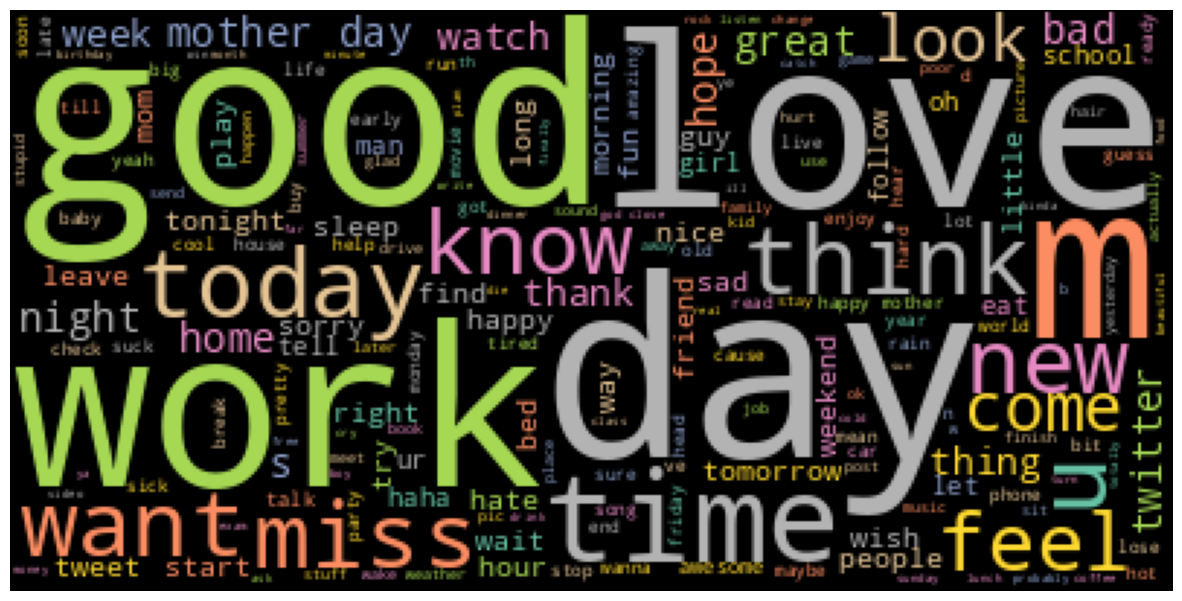

In [29]:
plt.figure(figsize = (15, 15), facecolor = None)
wc=WordCloud(colormap='Set2').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

## Fancy wordcloud

(-0.5, 1189.5, 1286.5, -0.5)

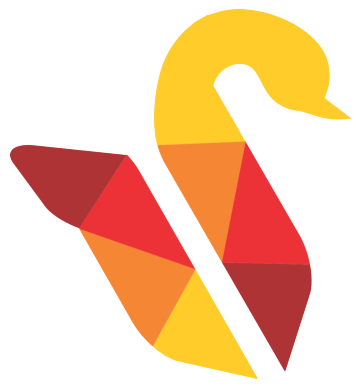

In [35]:
import numpy as np
from PIL import Image
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Assorted/statinfer-logo-transparent-icon.png", "statinfer-logo-transparent_v1.png")
BG_image = np.array(Image.open("statinfer-logo-transparent_v1.png"))
plt.imshow(BG_image)
plt.axis("off")

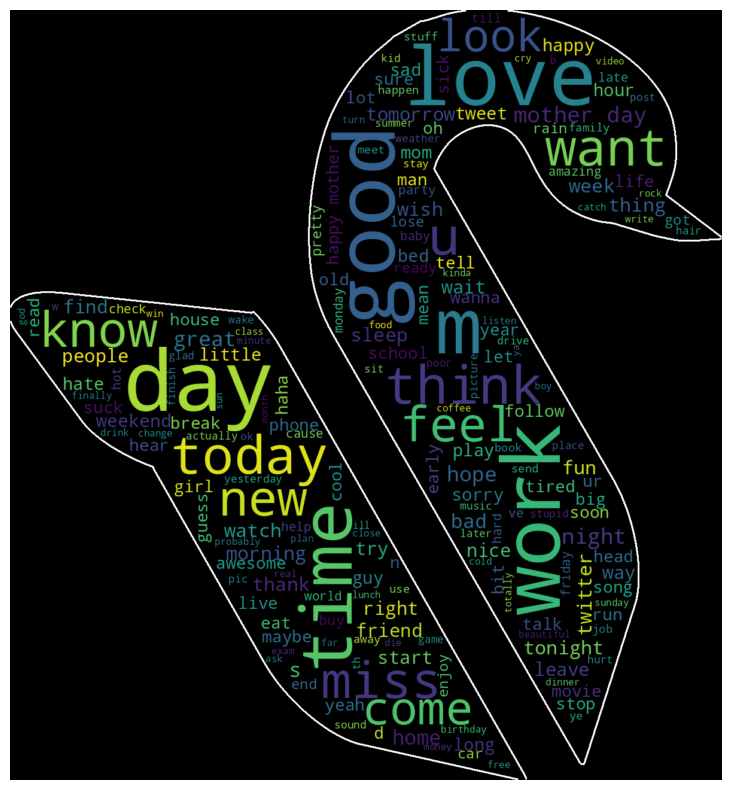

In [37]:
plt.figure(figsize = (10, 10))
wc=WordCloud(mask=BG_image, contour_color='white', contour_width=3).generate(final_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# A Single function for pre-processing

1.In real world, all above prepossing (besides word cloud) is done in single step by defining all steps in single function.
2. lower: for changing case
3. split:tokenization
4. stop words
5. regular exp
6. lemmatization
7. update stop words
8. join to form final data

In [38]:
def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])

In [42]:
pre_processing(input_data=twitter_data, text_col="raw_tweet")

                                               raw_tweet  \
0                    I`d have responded, if I were going   
1          Sooo SAD I will miss you here in San Diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       Sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                          text_col_clean  
0                                              I respond  
1                                sooo sad miss san diego  
2                                           boss bully I  
3                                        in

# Document Term Matrix

#converting text to numerical data: DTM

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 5) #minimum word freq=5
dtm_v1 = pd.DataFrame(countvec1.fit_transform(twitter_data['Final_Cleaned_Tweet_tokens']).toarray(),columns=countvec1.get_feature_names_out(),index=None)
print(dtm_v1.shape)
dtm_v1


(27481, 3469)


,aaaah,aah,abandon,ability,abit,able,absolutely,abt,ac,academy,...,yum,yummy,yup,zac,zealand,zero,zombie,zone,zoo,ï½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
